In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from descriptors import *
sns.set(font_scale=0.6)

### Chargement des images et labels

In [2]:
images_folder = "../data/caltech101_subset"
files_path = "../data/caltech101_subset/caltech101_subset.files"

image_files = []
labels = []

with open(files_path, "r") as f:
    for line in f:
        filename, label = line.strip().split()
        image_files.append(os.path.join(images_folder, filename))
        labels.append(label)

print(f"Nombre d'images : {len(image_files)}")
print(f"Classes : {sorted(set(labels))}")


Nombre d'images : 1000
Classes : ['Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai', 'car_side', 'chandelier', 'hawksbill', 'ketch', 'watch']


### Q1: Calcul des histogrammes de couleurs

In [3]:
color_desc = compute_color_descriptors(image_files, bins_per_channel=8)
print("Dimesnion du descripteurs :", color_desc.shape)

Dimesnion du descripteurs : (1000, 512)


#### Q2/3/4 Classification avec histogrammes de couleurs

Accuracy: 0.57


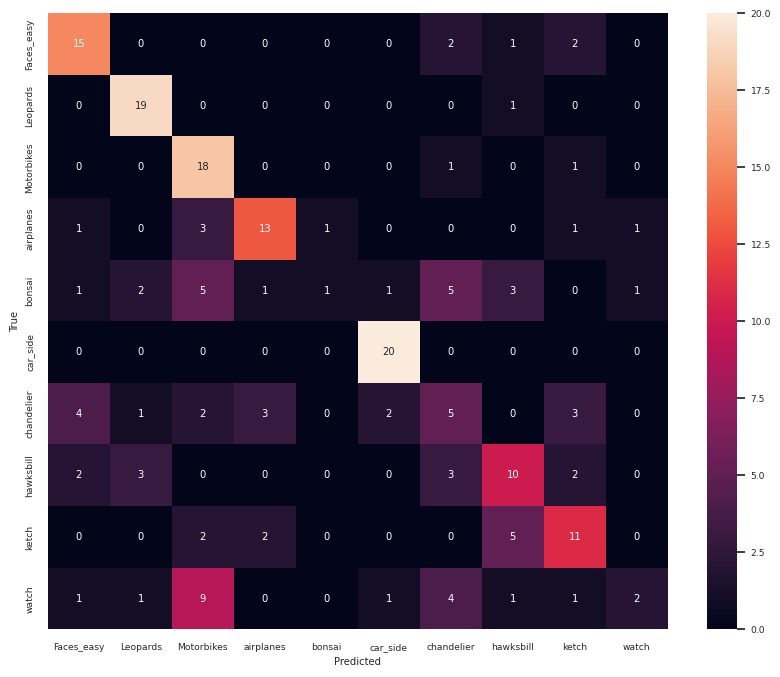

In [4]:
acc_color, cm_color, y_test_color, y_pred_color = train_test(color_desc, labels)

print("Accuracy:", acc_color)
plt.figure(figsize=(10,8))
sns.heatmap(cm_color, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


La classes pour laquelles la reconnaissance est la plus précise est `car_side`\
La classes pour laquelles la reconnaissance est la plus faible est `watch` ou `bonsai`.\
La classes la plus confondues sont `Motorbikes` en `watch`.

On peut supposer qu'il confond la classe `Motorbikes` en `watch`, car les images de `Motorbikes` sont sous fond blanc et certaines de `watch` aussi.

In [5]:
lbp_desc = lbp_descriptors(image_files, P=8, R=1, nbins=256)
print("Dimension du descripteurs LBP :", lbp_desc.shape)

Dimension du descripteurs LBP : (1000, 256)


### Q6: Classification avec histogrammes LBP

Accuracy : 0.395


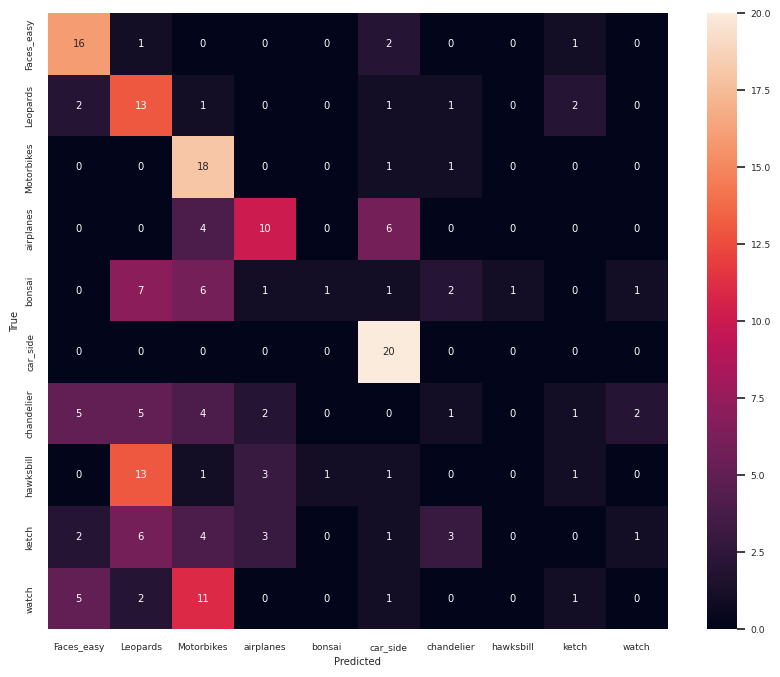

In [6]:
acc_lbp, cm_lbp, y_test_lbp, y_pred_lbp = train_test(lbp_desc, labels)

print("Accuracy :", acc_lbp)

plt.figure(figsize=(10,8))
sns.heatmap(cm_lbp, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Les classes les mieux reconnaissance sont `Motorbikes` et `car_side`.\
Les classes significativement moins reconnu sont `bonsai`, `chandelier`, `hawksbill`, `ketch` et `watch`.\
On remarque qu'avec l'histogramme de couleurs, on obtient de meilleurs résultats.\
On peut supposer que la couleurs est une information importante pour la reconnaissance sur ce dataset.

### Q7: Fusion des descripteurs

Dimension du descripteurs fusionnés : (1000, 768)
Accuracy : 0.595


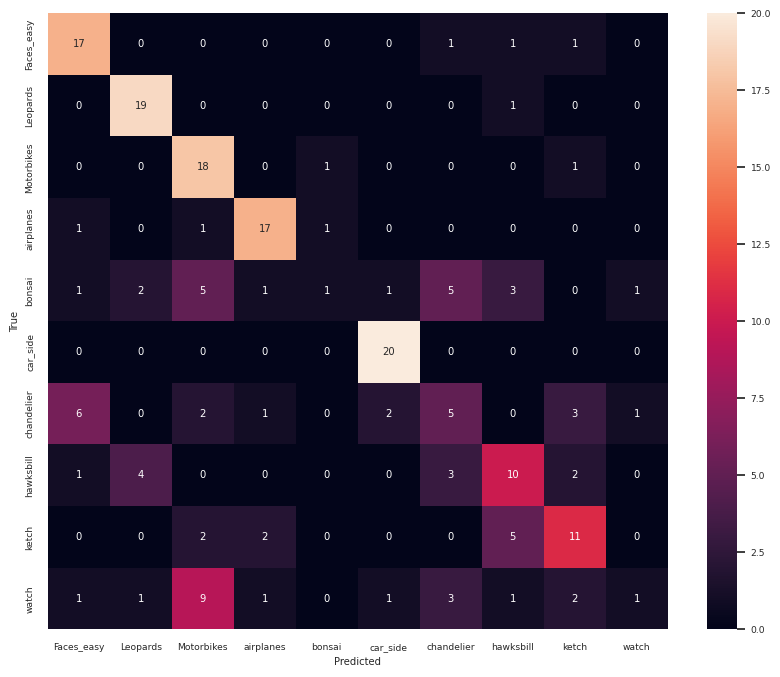

In [7]:
# Fusion couleur + LBP
fused_desc = fuse_descriptors(color_desc, lbp_desc)
print("Dimension du descripteurs fusionnés :", fused_desc.shape)

acc_fused, cm_fused, _, _ = train_test(fused_desc, labels)
print("Accuracy :", acc_fused)

plt.figure(figsize=(10,8))
sns.heatmap(cm_fused, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Voici les differents accuracy obtenus:

- Histogramme de couleurs : 0.57
- LBP: 0.395
- Fusion: 595

On peut supposer que grâce à la fusion des descripteurs, on obtient de meilleurs résultats. Car on garde l'information sur les couleurs, en plus de l'information de la forme.

### Q8: Descripteurs en grille (5x5)

Dimension du descripteurs grille couleur : (1000, 12800)
Accuracy (descripteurs grille couleur) : 0.76


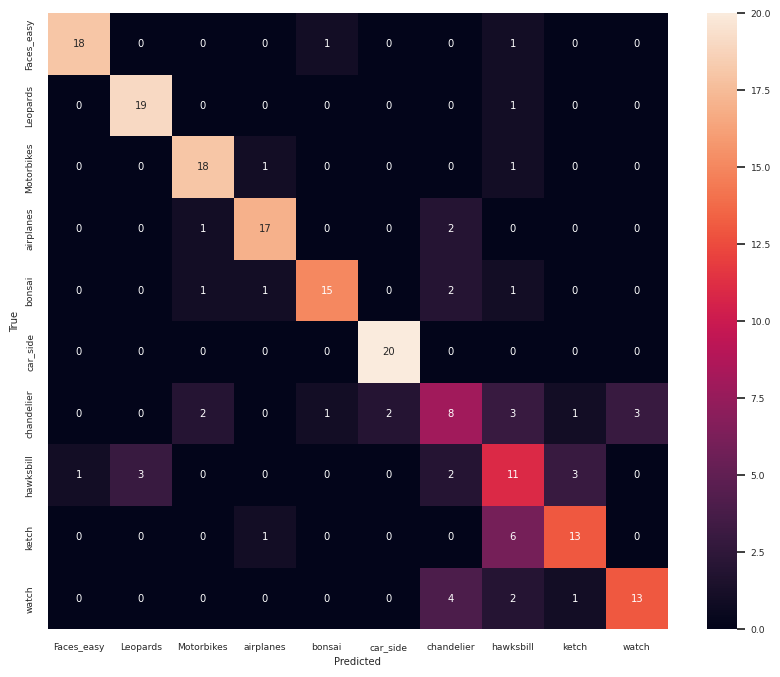

In [8]:
grid_desc_color = grid_descriptors(image_files, descriptor="color", grid_size=(5,5), bins_per_channel=8)
print("Dimension du descripteurs grille couleur :", grid_desc_color.shape)

acc_grid, cm_grid, _, _ = train_test(grid_desc_color, labels)
print("Accuracy (descripteurs grille couleur) :", acc_grid)

plt.figure(figsize=(10,8))
sns.heatmap(cm_grid, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
